### Импортим сторонние библиотеки

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Импортим наши модули

In [3]:
from dataset import load_svhn, random_split_train_val
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD
from metrics import multiclass_accuracy

### Подготавливаем тренировочные и проверочные данные

In [4]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0
    
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    return train_flat, test_flat
    
train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)    
train_X, test_X = prepare_for_neural_network(train_X, test_X)
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

### Посмотрим как они выглядят
train_X двухмерный массив, каждая строка - пиксели картинки с числом

In [9]:
train_X

array([[-0.08975373, -0.03568431,  0.08994824, ..., -0.12654745,
        -0.03998549,  0.09710392],
       [ 0.01612863,  0.01921765,  0.05465412, ..., -0.15007686,
        -0.13410314, -0.10681765],
       [-0.25445961, -0.32980196, -0.36887529, ..., -0.16968471,
        -0.20469137, -0.23230784],
       ...,
       [ 0.38083451,  0.36823725,  0.36053647, ...,  0.21462902,
         0.23060275,  0.21867255],
       [-0.2426949 , -0.22391961, -0.12965961, ..., -0.11478275,
        -0.14194627, -0.13034706],
       [ 0.01220706,  0.02706078,  0.18798745, ...,  0.09306039,
         0.06981843,  0.10886863]])

Количество пикселей одной картинки - 3072 (картинка размером 32 X 32 X 3), и количество картинок 9000

In [12]:
train_X.shape

(9000, 3072)

train_y - одномерный массив с ответом для каждой строки train_X

In [10]:
train_y

array([9, 9, 2, ..., 4, 2, 7], dtype=uint8)

In [13]:
train_y.shape

(9000,)

### Посмотрим как выглядит модель нейронной сети
TwoLayerNet - класс полносвязной нейронной сети из двух слоев.  
Число нейронов в первом слое (скрытом) будет 100, во втором (выходном) слое 10 нейронов

In [15]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100)

В параметрах layer1 и layer2 хранятся слои  
W - это веса слоя, в каждой строке веса соответствующего нейрона, вначале у них рандомные значения

In [18]:
model.layer1.W.value

array([[-3.89072467e-04, -5.04011031e-04,  1.15520985e-03, ...,
         7.64432541e-04,  7.07017974e-04, -1.77692213e-04],
       [ 4.48590040e-04, -1.69653230e-03,  1.27763739e-03, ...,
         1.04908135e-04, -1.21518254e-03,  2.00166751e-03],
       [ 3.89009280e-04, -1.35102173e-03, -6.00856144e-04, ...,
        -7.85938322e-04,  9.65577158e-04, -9.67594241e-04],
       ...,
       [-2.83181641e-05, -5.53340066e-04,  1.84739352e-03, ...,
        -9.37418390e-04,  7.55682260e-04, -7.13510969e-04],
       [ 6.88473869e-04,  2.68522711e-04,  2.16869182e-03, ...,
         1.08176205e-05,  1.73939684e-05,  1.07359477e-03],
       [-3.88108559e-05, -1.64988007e-03, -3.91306651e-05, ...,
         2.53242686e-04, -1.22137076e-03,  9.85888496e-05]])

In [22]:
model.layer1.W.value.shape

(3072, 100)

In [23]:
model.layer2.W.value.shape

(100, 10)

Выполним прямой и обратный проход первой картинки, и посчитаем градиенты на каждом слое для каждого нейрона  
Посмотрим для примера как выглядит градиент для первого слоя

In [28]:
model.compute_loss_and_gradients(train_X[0:1], train_y[0:1])
model.layer1.W.grad

array([[ 0.00000000e+00,  0.00000000e+00,  3.80934369e-08, ...,
        -7.54366120e-08,  4.73753975e-08,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.51452003e-08, ...,
        -2.99921114e-08,  1.88355251e-08,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.81759911e-08, ...,
         7.56000945e-08, -4.74780671e-08,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  5.37094957e-08, ...,
        -1.06361167e-07,  6.67965119e-08,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.69707133e-08, ...,
        -3.36071834e-08,  2.11058481e-08,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -4.12130202e-08, ...,
         8.16143376e-08, -5.12551079e-08,  0.00000000e+00]])

In [32]:
model.layer1.W.grad.shape

(3072, 100)

### Обучение с оценкой качества на каждой эпохе  
Выполняю полное обучение на всех данных, пересчитывая градиенты в 30 итераций (эпох) обучая на всех батчах размером 100 картинок в каждой итерации  
Кроме подсчета loss внутри нейронки, считаю отдельно долю верных ответов на каждый батч и усредняю для эпохи  
learning_rate - размер шага, с которым смещаем веса после посчета градиентов

In [33]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate = 1e-2, num_epochs=30, batch_size=30)

loss_history, train_history, val_history = trainer.fit()

Loss: 57.234773, Train accuracy: 0.360444, val accuracy: 0.372000
Loss: 41.479199, Train accuracy: 0.496556, val accuracy: 0.508000
Loss: 26.356709, Train accuracy: 0.627556, val accuracy: 0.604000
Loss: 33.991876, Train accuracy: 0.622000, val accuracy: 0.608000
Loss: 29.939324, Train accuracy: 0.694111, val accuracy: 0.645000
Loss: 34.788896, Train accuracy: 0.702222, val accuracy: 0.651000
Loss: 31.063987, Train accuracy: 0.713444, val accuracy: 0.667000
Loss: 19.710788, Train accuracy: 0.731000, val accuracy: 0.676000
Loss: 30.725194, Train accuracy: 0.715667, val accuracy: 0.654000
Loss: 28.663691, Train accuracy: 0.787333, val accuracy: 0.706000
Loss: 30.053167, Train accuracy: 0.776778, val accuracy: 0.684000
Loss: 34.369416, Train accuracy: 0.781889, val accuracy: 0.694000
Loss: 29.110675, Train accuracy: 0.731667, val accuracy: 0.651000
Loss: 26.078125, Train accuracy: 0.762111, val accuracy: 0.669000
Loss: 20.310482, Train accuracy: 0.817111, val accuracy: 0.720000
Loss: 28.9

На графиках вывожу долю верных ответов для обучающей выборки и тестовой

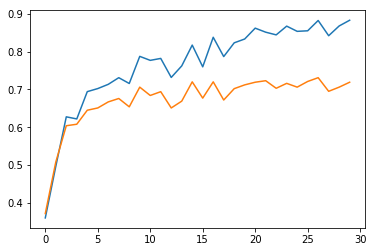

In [34]:
plt.plot(train_history)
plt.plot(val_history)

Это как уменьшалась loss внутри нейронки во время обучения

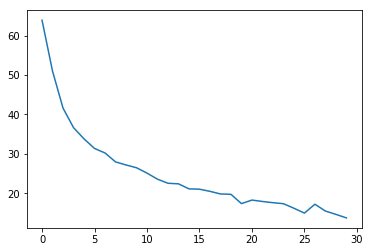

In [35]:
plt.plot(loss_history)